In [388]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
import joblib
from joblib import dump

In [389]:
df_data=pd.read_csv("./data/all_tables_combined.csv")

In [390]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [391]:
df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]

In [392]:
df_s_parent['NUM_DAYS']=df_s_parent['END_DAY'] - df_s_parent['START_DAY'] + 1
df_s_parent.drop(['START_DAY','END_DAY','COUPON_UPC','HH_COMP_DESC','household_key','PRODUCT_ID'], axis=1, inplace=True)

<ipython-input-392-20fee7475a6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_parent['NUM_DAYS']=df_s_parent['END_DAY'] - df_s_parent['START_DAY'] + 1
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [393]:
df_s_parent.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
472,1,1.00,403,-0.50,1142,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,69,MEAT-PCKGD,Private,LUNCHMEAT,HAM,6 OZ,56
473,1,5.45,403,-2.19,1142,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56


In [394]:
#sns.pairplot(df_s_parent)

In [395]:
df_s_parent

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
472,1,1.00,403,-0.50,1142,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,69,MEAT-PCKGD,Private,LUNCHMEAT,HAM,6 OZ,56
473,1,5.45,403,-2.19,1142,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
474,2,10.24,403,-4.11,1040,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
475,1,6.42,403,-2.58,1844,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
476,3,11.97,403,0.00,1142,0.0,0.0,TypeA,18,591,...,Homeowner,3,2,5154,MEAT,National,BEEF,ANGUS,1 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112013,1,2.99,304,-0.20,1456,0.0,0.0,TypeA,18,603,...,Homeowner,4,3+,236,GROCERY,National,FROZEN BREAD/DOUGH,FRZN BISCUITS,20.8 OZ,56
112014,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,18,603,...,Homeowner,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,28 OZ,56
112015,1,2.99,304,-1.00,1456,0.0,0.0,TypeA,13,526,...,Homeowner,4,3+,93,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,16 OZ,48
112016,1,2.50,304,-0.79,1456,0.0,0.0,TypeA,18,603,...,Homeowner,4,3+,1598,MEAT-PCKGD,National,FROZEN MEAT,CORN DOGS,9.87 OZ,56


In [396]:
df_s_parent['SUB_COMMODITY_DESC'].value_counts().head(10)

FRZN MULTI SERVE ENTREES ALL      164
FRZN BAGGED VEGETABLES - PLAIN    162
YOGURT NOT MULTI-PACKS            158
PREMIUM                           158
FRZN SS PREMIUM ENTREES/DNRS/T    152
SNACKS/APPETIZERS                 147
FLUID MILK WHITE ONLY             140
DAIRY CASE 100% PURE JUICE - O    132
SOFT DRINKS 12/18&15PK CAN CAR    123
SS ECONOMY ENTREES/DINNERS ALL    122
Name: SUB_COMMODITY_DESC, dtype: int64

In [397]:
df_s_parent[df_s_parent['SUB_COMMODITY_DESC'].str.contains('MILK')]['SUB_COMMODITY_DESC'].unique()

array(['FLUID MILK WHITE ONLY', 'INFANT FORMULA MILK BASE',
       'MISCELLANEOUS MILK', 'CHOCOLATE MILK'], dtype=object)

In [398]:
df_s_parent=df_s_parent[(df_s_parent['SUB_COMMODITY_DESC']=='FLUID MILK WHITE ONLY') | (df_s_parent['SUB_COMMODITY_DESC']=='MISCELLANEOUS MILK') | (df_s_parent['SUB_COMMODITY_DESC']=='CHOCOLATE MILK')]

In [399]:
df_s_parent.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN',
       'DAY', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT', 'NUM_DAYS'],
      dtype=object)

In [400]:
df_s_parent.drop(['STORE_ID','TRANS_TIME','description', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC'], axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [401]:
df_s_parent

,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
3440,1,2.49,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48
3441,1,1.67,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48
3442,2,4.98,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48
3443,1,2.49,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48
3444,1,1.67,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48
...,...,...,...,...,...,...,...,...,...,...,...,...
98393,1,1.00,-0.79,0.0,0.0,13,506,69,Private,CHOCOLATE MILK,,48
98394,2,3.88,0.00,0.0,0.0,13,506,69,Private,CHOCOLATE MILK,,48
107281,1,1.89,0.00,0.0,0.0,8,417,709,National,MISCELLANEOUS MILK,16 OZ,49
108984,1,2.79,0.00,0.0,0.0,8,417,69,Private,CHOCOLATE MILK,1 GA,49


In [402]:
df_s_parent['CURR_SIZE_OF_PRODUCT'].value_counts()

         86
1 GA     60
1 PT     20
16 OZ     6
1 QT      2
PT        1
Name: CURR_SIZE_OF_PRODUCT, dtype: int64

In [403]:
def label_to_volume(label):
    volume=int()
    if label=='1 GA':
        volume=128
    elif label=='1 PT':
        volume=16
    elif label=='16 OZ':
        volume=16
    elif label=='1 QT':
        volume=32
    elif label=='PT':
        volume=16
        
    return volume

vect_label_to_volume=np.vectorize(label_to_volume)

In [404]:
df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])
df_s_parent.head()

<ipython-input-404-8d7fce3a0822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME
3440,1,2.49,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
3441,1,1.67,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
3442,2,4.98,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
3443,1,2.49,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
3444,1,1.67,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128


In [405]:
df_s_parent.groupby('CAMPAIGN').sum()

,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY,MANUFACTURER,NUM_DAYS,VOLUME
CAMPAIGN,,,,,,,,,
8,78,99.87,-22.99,0.0,0.0,28356,11330,3332,608
13,187,325.75,-89.46,0.0,0.0,54142,12737,5136,7568


In [406]:
sales=df_s_parent['SALES_VALUE']

In [407]:
df_s_parent_features=df_s_parent.drop('SALES_VALUE', axis=1)

In [408]:
dummy=pd.get_dummies(df_s_parent_features['BRAND'],drop_first=True)
dummy_milk_type=pd.get_dummies(df_s_parent_features['SUB_COMMODITY_DESC'],drop_first=True)
df_s_parent_features=pd.concat([df_s_parent_features,dummy], axis=1)
df_s_parent_features=pd.concat([df_s_parent_features,dummy_milk_type], axis=1)
df_s_parent_features

,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME,Private,FLUID MILK WHITE ONLY,MISCELLANEOUS MILK
3440,1,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128,1,1,0
3441,1,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128,1,1,0
3442,2,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128,1,1,0
3443,1,0.00,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128,1,1,0
3444,1,-0.82,0.0,0.0,13,506,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98393,1,-0.79,0.0,0.0,13,506,69,Private,CHOCOLATE MILK,,48,0,1,0,0
98394,2,0.00,0.0,0.0,13,506,69,Private,CHOCOLATE MILK,,48,0,1,0,0
107281,1,0.00,0.0,0.0,8,417,709,National,MISCELLANEOUS MILK,16 OZ,49,16,0,0,1
108984,1,0.00,0.0,0.0,8,417,69,Private,CHOCOLATE MILK,1 GA,49,128,1,0,0


In [409]:
df_s_parent_features.drop(['QUANTITY','BRAND','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

<AxesSubplot:>

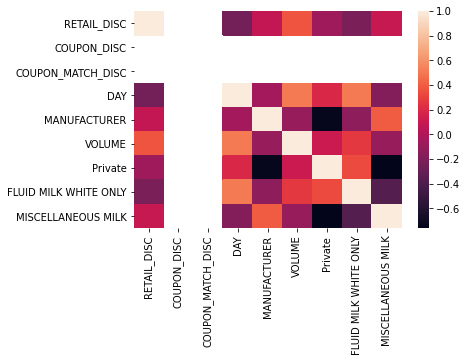

In [410]:
sns.heatmap(df_s_parent_features.corr())

In [411]:
X=df_s_parent_features
y=sales

In [412]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

In [413]:
sscaler=StandardScaler()

In [414]:
X_train_scaled=sscaler.fit_transform(X_train)
X_test_scaled=sscaler.transform(X_test)

In [415]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001)

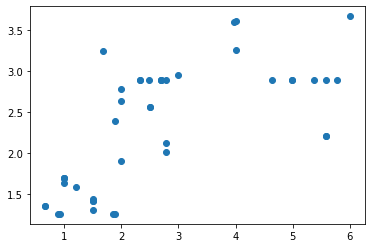

In [416]:
y_preds=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_preds)

/home/user-1711/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_VALUE'>

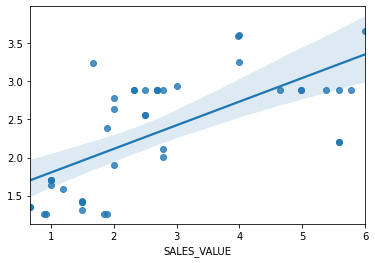

In [417]:
sns.regplot(y_test,y_preds)

In [418]:
pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)

,features,coefs
5,VOLUME,0.391781
3,DAY,0.371869
7,FLUID MILK WHITE ONLY,0.045094
1,COUPON_DISC,0.000000
2,COUPON_MATCH_DISC,0.000000
8,MISCELLANEOUS MILK,-0.181185
4,MANUFACTURER,-0.245282
0,RETAIL_DISC,-0.445421
6,Private,-0.497607


In [419]:
cross_val_score(lasso, X_train_scaled,y_train)

/home/user-1711/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25109820763631774, tolerance: 0.014288782211538455
  model = cd_fast.enet_coordinate_descent(


array([0.39752101, 0.33858323, 0.56693541, 0.37431709, 0.13180595])

In [420]:
cross_val_score(lasso, X_test_scaled,y_test)

/home/user-1711/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024660408923828925, tolerance: 0.007023966857142857
  model = cd_fast.enet_coordinate_descent(
/home/user-1711/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026421870376829304, tolerance: 0.009535627428571431
  model = cd_fast.enet_coordinate_descent(
/home/user-1711/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02420346571926757, tolerance: 0.009858575555555556
  model = cd_fast.enet_coordinate_descent(


array([ 0.2245133 ,  0.22700143,  0.50475217, -0.32919372, -0.14350319])

Next let's take the columns whose coefficients have a magnitude over 0.01. We'll try to estimate using ridge instead of lasso and see hot it performs.

NB: REMOVE THE UNECESSARY COLUMNS FROM THE FEATURE MATRIX. NOT DONE YET.

In [421]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [422]:
y_ridge_preds=ridge.predict(X_test_scaled)

In [423]:
cross_val_score(ridge, X_test_scaled,y_test)

array([ 0.25142885,  0.24977541,  0.50034606, -0.24034194, -0.12827291])

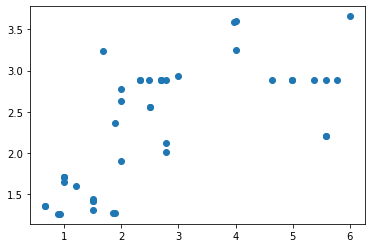

In [424]:
plt.scatter(y_test,y_ridge_preds)

In [425]:
dump(lasso, 'spf_model.joblib')

['spf_model.joblib']